In [18]:
import pandas as pd

#libs para gráficos
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

#algoritmos de agrupamento 
from sklearn.cluster import KMeans, DBSCAN

#avaliar desempenho
from sklearn.metrics import adjusted_rand_score, silhouette_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
dados = pd.read_csv("https://raw.githubusercontent.com/FIAP/Pos_Tech_DTAT/073d3c7ab0cd105f8ad2fb347c0f02cb36773ee4/Aula%2003/Base%20de%20Dados/mall.csv",
                    sep=',')

In [5]:
dados.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
dados.shape

(200, 5)

In [8]:
dados.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
dados.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [12]:
dados['Annual Income (k$)'].median()

61.5

array([[<AxesSubplot: title={'center': 'CustomerID'}>,
        <AxesSubplot: title={'center': 'Age'}>],
       [<AxesSubplot: title={'center': 'Annual Income (k$)'}>,
        <AxesSubplot: title={'center': 'Spending Score (1-100)'}>]],
      dtype=object)

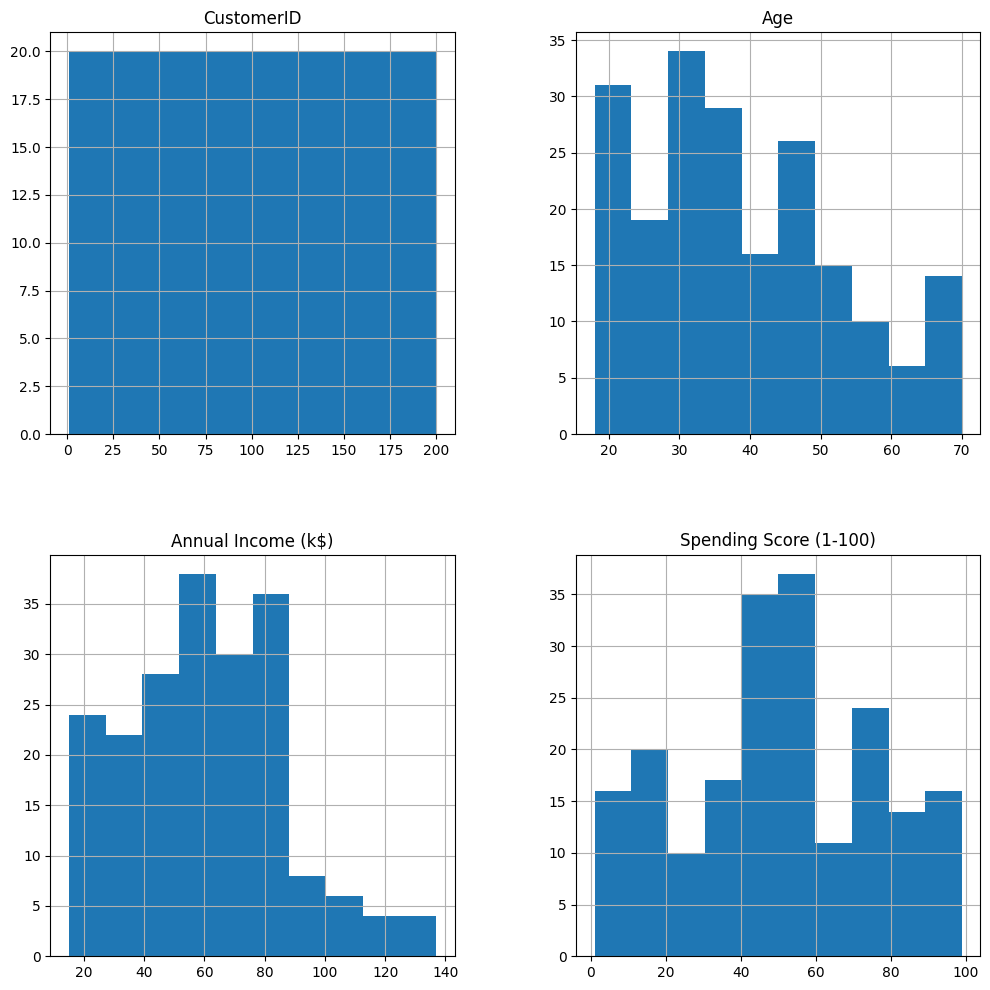

In [13]:
dados.hist(figsize=(12,12))

<AxesSubplot: >

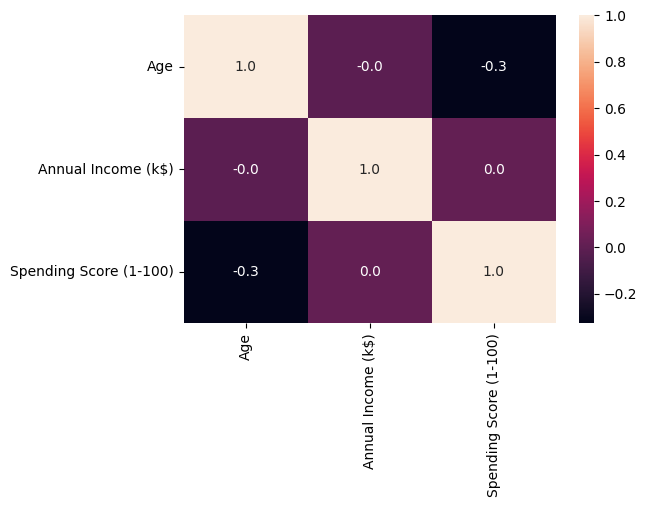

In [15]:
plt.figure(figsize=(6,4))
sns.heatmap(dados[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(method='pearson'),
            annot=True, fmt=".1f")

In [16]:
dados['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

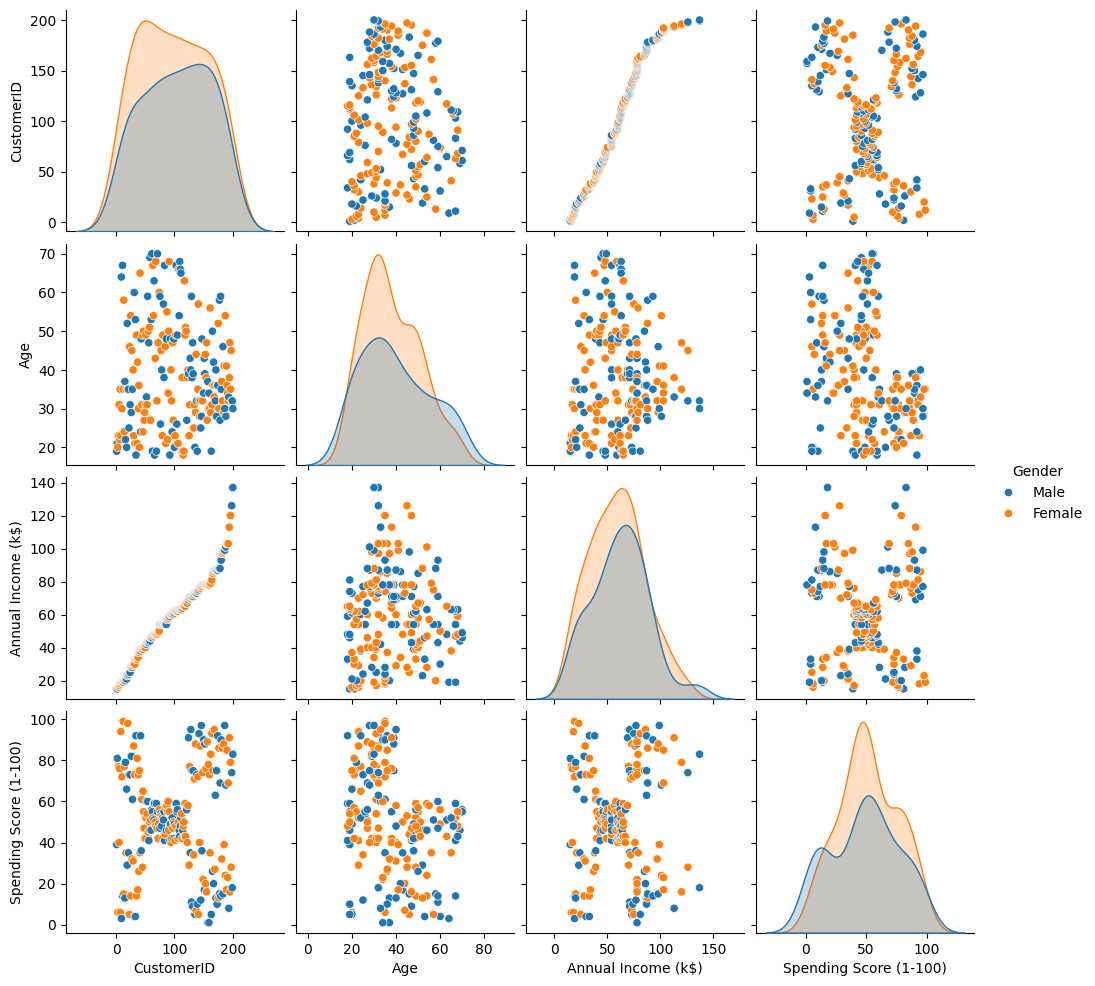

In [17]:
sns.pairplot(dados, hue='Gender')
plt.show()

In [20]:
scaler = StandardScaler()
scaler.fit(dados[['Annual Income (k$)', 'Spending Score (1-100)']])

,copy,True
,with_mean,True
,with_std,True


In [21]:
dados_escalonados = scaler.transform(dados[['Annual Income (k$)', 'Spending Score (1-100)']])

In [22]:
dados_escalonados

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,